Ref: https://www.joinquant.com/post/7922

本节以 红酒口感数据集 为例。此数据集记录了各种红酒的一系列化学成分，以及专业品酒员的口感评分值。
## 红酒口感数据集的读取

In [9]:
#! wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

import numpy as np

In [4]:
import pandas as pd

target_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(target_url, header=0, sep=";")
# fixed acidity | volatile acidity | citric acid | residual sugar | chlorides | free sulfur dioxide | 
# total sulfur dioxide | density  |  pH | sulphates | alcohol  quality
df.columns = ['非挥发性酸','挥发性酸','柠檬酸', '残留糖分', '氯化物', '游离二氧化硫','总二氧化硫', '密度', 
              'PH值', '亚硝酸盐', '酒精含量', '品质']

print("数据集规模：",df.shape )
print("\n数据集数据类型：\n",df.get_dtype_counts() )
print('\n数据集头5条数据：\n',df.head() )
print('\n数据集描述：\n', df.describe() )

数据集规模： (1599, 12)

数据集数据类型：
 float64    11
int64       1
dtype: int64

数据集头5条数据：
    非挥发性酸  挥发性酸   柠檬酸  残留糖分    氯化物  游离二氧化硫  总二氧化硫      密度   PH值  亚硝酸盐  酒精含量  品质
0    7.4  0.70  0.00   1.9  0.076    11.0   34.0  0.9978  3.51  0.56   9.4   5
1    7.8  0.88  0.00   2.6  0.098    25.0   67.0  0.9968  3.20  0.68   9.8   5
2    7.8  0.76  0.04   2.3  0.092    15.0   54.0  0.9970  3.26  0.65   9.8   5
3   11.2  0.28  0.56   1.9  0.075    17.0   60.0  0.9980  3.16  0.58   9.8   6
4    7.4  0.70  0.00   1.9  0.076    11.0   34.0  0.9978  3.51  0.56   9.4   5

数据集描述：
              非挥发性酸         挥发性酸          柠檬酸         残留糖分          氯化物  \
count  1599.000000  1599.000000  1599.000000  1599.000000  1599.000000   
mean      8.319637     0.527821     0.270976     2.538806     0.087467   
std       1.741096     0.179060     0.194801     1.409928     0.047065   
min       4.600000     0.120000     0.000000     0.900000     0.012000   
25%       7.100000     0.390000     0.090000     1.900000     0.0

## 绘制标准化后的箱线图

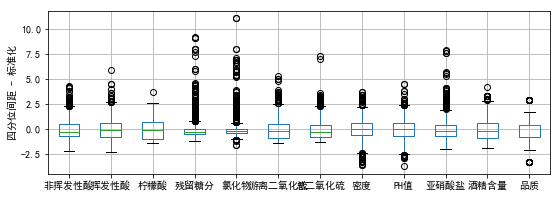

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 3))

((df - df.mean()) / df.std()).boxplot()
plt.ylabel("四分位间距 - 标准化")
plt.show()

## 平行坐标图
第一张图仅仅对标签值进行标准化，但对数据范围较小的变量压缩的看不清，于是有第二张图。

第二张图对所有变量都进行了标准化，效果大为改善。

可视化结果发现，深蓝线（高品质）聚集在酒精含量高值区；而深红线（低品质）聚集在挥发性酸的高值区。这些都是最明显的相关属性。

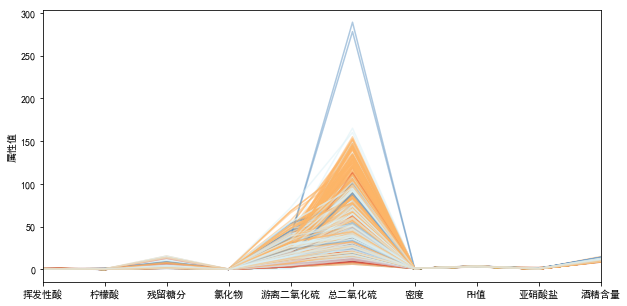

In [10]:

_lim = (df.shape[1]-1)
xs = df.iloc[:,_lim]*1.0
_xs = (xs-xs.mean())/xs.std()
_xs = 1.0/(1.0+np.exp(-_xs))
plt.figure(figsize=(10, 5))
for i in range(df.shape[0]):    
    df.iloc[i,1:_lim].plot(color=plt.cm.RdYlBu(_xs[i]),alpha=0.5)
plt.ylabel("属性值")
plt.show()

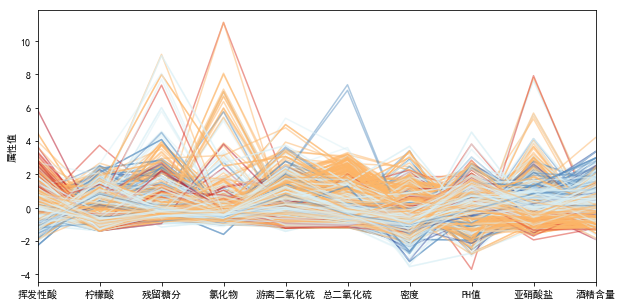

In [11]:


_df = (df-df.mean())/df.std()
xs = _df.iloc[:,_lim]*1.0
_xs = 1.0/(1.0+np.exp(-xs))
plt.figure(figsize=(10, 5))
for i in range(df.shape[0]):    
    _df.iloc[i,1:_lim].plot(color=plt.cm.RdYlBu(_xs[i]),alpha=0.5)
plt.ylabel("属性值")
plt.show()


## 相关性热图

暖色对应强相关。


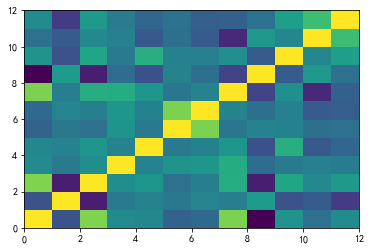

In [6]:

plt.pcolor(df.corr())
plt.show()
